<a href="https://colab.research.google.com/github/minolinesith/FYP/blob/Ensemble-Model/Ensemble_model_averaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Connecting to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
train_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/validation'
test_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/test'

In [4]:
img_width = 224
img_height = 224

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False,
)

valid_data = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

Found 1601 files belonging to 8 classes.
Found 480 files belonging to 8 classes.
Found 160 files belonging to 8 classes.


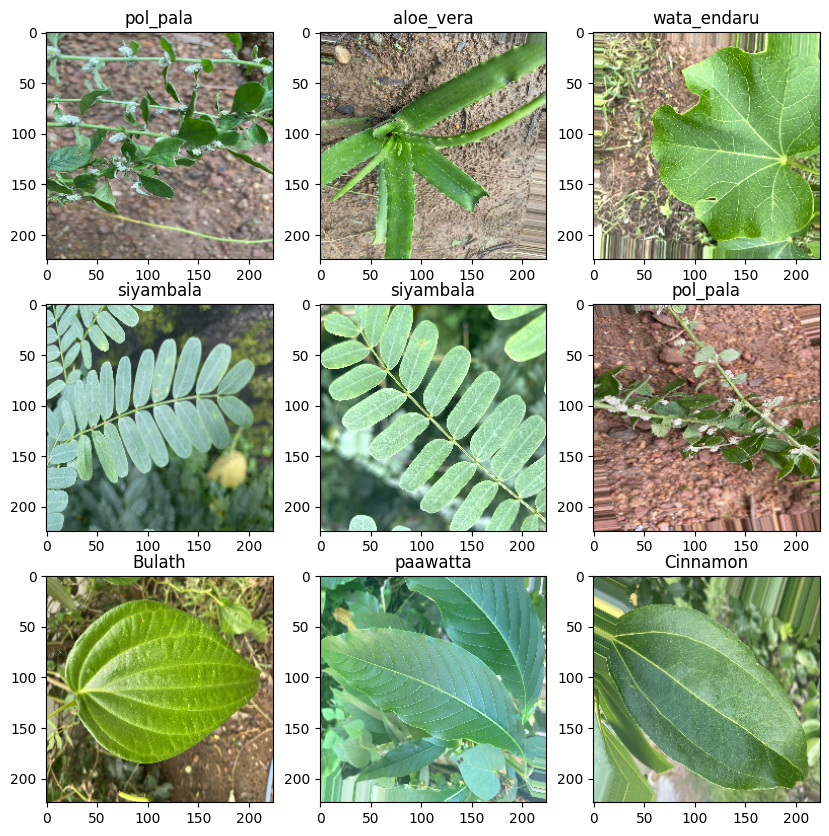

In [6]:
#https://youtu.be/V61xy1ZnVTM?si=NawMTujUTEjKMlqu
plt.figure(figsize=(10,10))
for img, labels in train_data.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(train_data.class_names[labels[i]])

## Early Stopping Implementation

In [7]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True )

# ResNet50

In [8]:
from tensorflow.keras.applications import ResNet50

In [9]:
Resnet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [10]:
for layer in Resnet50_base_model.layers:
    layer.trainable = False

In [38]:
Resnet50_model = Sequential()
Resnet50_model.add(Resnet50_base_model)
Resnet50_model.add(layers.Flatten())
Resnet50_model.add(layers.Dense(1024, activation='relu'))
Resnet50_model.add(layers.Dropout(0.5))
Resnet50_model.add(layers.Dense(512, activation='relu'))
Resnet50_model.add(layers.Dropout(0.5))
Resnet50_model.add(layers.Dense(8, activation ='softmax'))

In [39]:
Resnet50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [40]:
epochs = 10
resnet50_history = Resnet50_model.fit(train_data, validation_data = valid_data, epochs = epochs, callbacks=[callback])

Epoch 1/10
161/161 [==============================] - 131s 764ms/step - loss: 1.3751 - accuracy: 0.8264 - val_loss: 0.0207 - val_accuracy: 0.9958
Epoch 2/10
161/161 [==============================] - 105s 630ms/step - loss: 0.2006 - accuracy: 0.9644 - val_loss: 9.9205e-04 - val_accuracy: 1.0000
Epoch 3/10
161/161 [==============================] - 103s 614ms/step - loss: 0.1579 - accuracy: 0.9731 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 4/10
161/161 [==============================] - 102s 612ms/step - loss: 0.1496 - accuracy: 0.9850 - val_loss: 2.2352e-09 - val_accuracy: 1.0000
Epoch 5/10
161/161 [==============================] - 101s 604ms/step - loss: 0.0776 - accuracy: 0.9913 - val_loss: 8.9495e-07 - val_accuracy: 1.0000
Epoch 6/10
161/161 [==============================] - 108s 651ms/step - loss: 0.0795 - accuracy: 0.9888 - val_loss: 1.4217e-05 - val_accuracy: 1.0000
Epoch 7/10
161/161 [==============================] - 103s 619ms/step - loss: 0.0901 - accuracy: 0.9881 - va

In [41]:
resnet50_test_loss, resnet50_test_accuracy = Resnet50_model.evaluate(test_data)

print(f'Test Accuracy: {resnet50_test_accuracy * 100:.2f}%')

16/16 [==============================] - 9s 538ms/step - loss: 0.4906 - accuracy: 0.9500
Test Accuracy: 95.00%


In [36]:
Resnet50_model.save('LifeVeda_Resnet50.keras')

# VGG16

In [15]:
from tensorflow.keras.applications import VGG16

In [16]:
VGG16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [17]:
for layer in VGG16_base_model.layers:
    layer.trainable = False

In [18]:
vgg16_model = Sequential()
vgg16_model.add(VGG16_base_model)
vgg16_model.add(layers.Flatten())
vgg16_model.add(layers.Dense(512, activation='relu'))
vgg16_model.add(layers.Dropout(0.5))
vgg16_model.add(layers.Dense(8, activation ='softmax'))

In [19]:
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [20]:
epochs = 10
history = vgg16_model.fit(train_data, validation_data = valid_data, epochs = epochs, callbacks=[callback])

Epoch 1/10
161/161 [==============================] - 101s 579ms/step - loss: 2.6318 - accuracy: 0.8770 - val_loss: 0.2716 - val_accuracy: 0.9646
Epoch 2/10
161/161 [==============================] - 93s 561ms/step - loss: 0.2411 - accuracy: 0.9844 - val_loss: 0.0114 - val_accuracy: 0.9979
Epoch 3/10
161/161 [==============================] - 101s 606ms/step - loss: 0.0859 - accuracy: 0.9925 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/10
161/161 [==============================] - 101s 604ms/step - loss: 0.1021 - accuracy: 0.9950 - val_loss: 1.9443e-05 - val_accuracy: 1.0000
Epoch 5/10
161/161 [==============================] - 101s 604ms/step - loss: 0.1468 - accuracy: 0.9900 - val_loss: 3.3392e-06 - val_accuracy: 1.0000
Epoch 6/10
161/161 [==============================] - 120s 715ms/step - loss: 0.1128 - accuracy: 0.9944 - val_loss: 1.8501e-07 - val_accuracy: 1.0000
Epoch 7/10
161/161 [==============================] - 102s 607ms/step - loss: 0.0322 - accuracy: 0.9969 - val_los

In [21]:
vgg16_test_loss, vgg16_test_accuracy = vgg16_model.evaluate(test_data)

print(f'Test Accuracy: {vgg16_test_accuracy * 100:.2f}%')

16/16 [==============================] - 6s 349ms/step - loss: 2.0726 - accuracy: 0.8750
Test Accuracy: 87.50%


In [22]:
def predict_image(model, image):
  classes=train_data.class_names
  image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
  img_arr = tf.keras.utils.array_to_img(image)
  img_batch = tf.expand_dims(img_arr,0)
  predict = model.predict(img_batch)
  print('Leaf is of plant {} with an accuracy of {:0.2f}'.format(classes[np.argmax(predict)],np.max(predict)*100))

# EfficientNetB5

In [23]:
from tensorflow.keras.applications import EfficientNetB5

In [24]:
EfficientNetB5_base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

115263384/115263384 [==============================] - 1s 0us/step


In [25]:
for layer in EfficientNetB5_base_model.layers:
    layer.trainable = False

In [26]:
EfficientNetB5_model = Sequential()
EfficientNetB5_model.add(EfficientNetB5_base_model)
EfficientNetB5_model.add(layers.Flatten())
EfficientNetB5_model.add(layers.Dense(512, activation='relu'))
EfficientNetB5_model.add(layers.Dropout(0.5))
EfficientNetB5_model.add(layers.Dense(8, activation ='softmax'))

In [27]:
EfficientNetB5_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [28]:
epochs = 10
history = EfficientNetB5_model.fit(train_data, validation_data = valid_data, epochs = epochs, callbacks=[callback])

Epoch 1/10
161/161 [==============================] - 128s 670ms/step - loss: 3.8720 - accuracy: 0.8688 - val_loss: 0.1465 - val_accuracy: 0.9854
Epoch 2/10
161/161 [==============================] - 106s 633ms/step - loss: 0.9306 - accuracy: 0.9532 - val_loss: 0.1263 - val_accuracy: 0.9917
Epoch 3/10
161/161 [==============================] - 125s 758ms/step - loss: 0.3080 - accuracy: 0.9794 - val_loss: 0.0899 - val_accuracy: 0.9958
Epoch 4/10
161/161 [==============================] - 101s 606ms/step - loss: 0.4292 - accuracy: 0.9769 - val_loss: 0.0128 - val_accuracy: 0.9958
Epoch 5/10
161/161 [==============================] - 106s 636ms/step - loss: 0.4825 - accuracy: 0.9763 - val_loss: 0.0123 - val_accuracy: 0.9979
Epoch 6/10
161/161 [==============================] - 104s 627ms/step - loss: 0.2776 - accuracy: 0.9813 - val_loss: 5.2154e-09 - val_accuracy: 1.0000
Epoch 7/10
161/161 [==============================] - 120s 717ms/step - loss: 0.4564 - accuracy: 0.9769 - val_loss: 1.02

In [29]:
efficientnetb5_test_loss, efficientnetb5_test_accuracy = EfficientNetB5_model.evaluate(test_data)

print(f'Test Accuracy: {efficientnetb5_test_accuracy * 100:.2f}%')

16/16 [==============================] - 8s 499ms/step - loss: 0.3430 - accuracy: 0.9750
Test Accuracy: 97.50%


In [37]:
EfficientNetB5_model.save('LifeVeda_EfficientNetB5.keras')

# Ensemble Model - Voting

# Ensemble Model - Averaging

In [30]:
from tensorflow.keras.layers import Average

models = [Resnet50_model, vgg16_model, EfficientNetB5_model]


In [31]:
model_input = keras.Input(shape=(img_width,img_height,3))
models_output=[model(model_input) for model in models]
average_output=layers.average(models_output)

for model in models:
  for layer in model.layers:
      layer.trainable = False

ensemble_model=keras.Model(inputs=model_input,outputs=average_output)



In [32]:
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [33]:
epochs = 5
history = ensemble_model.fit(train_data, validation_data = valid_data, epochs = epochs)

Epoch 1/5
161/161 [==============================] - 130s 656ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 1.1429e-06 - val_accuracy: 1.0000
Epoch 2/5
161/161 [==============================] - 102s 608ms/step - loss: 0.0104 - accuracy: 0.9988 - val_loss: 1.1429e-06 - val_accuracy: 1.0000
Epoch 3/5
161/161 [==============================] - 105s 623ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 1.1429e-06 - val_accuracy: 1.0000
Epoch 4/5
161/161 [==============================] - 107s 645ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.1429e-06 - val_accuracy: 1.0000
Epoch 5/5
161/161 [==============================] - 128s 776ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.1429e-06 - val_accuracy: 1.0000


In [34]:
ensemble_test_loss, ensemble_test_accuracy = ensemble_model.evaluate(test_data)

print(f'Test Accuracy: {ensemble_test_accuracy * 100:.2f}%')

16/16 [==============================] - 8s 474ms/step - loss: 0.1391 - accuracy: 0.9750
Test Accuracy: 97.50%


In [35]:
#ensemble_model.save('LifeVeda_Ensemble_averaging.keras')